In [ ]:
# Description:  This program uses the Moving Average COnvergence/ Divergence(MACD) crossover
#               to determine when to buy and sell stock.

In [19]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
# Load the data
from google.colab import files

uploaded = files.upload()

Saving AAPL_3M.csv to AAPL_3M.csv


In [21]:
# Store the data into a df
df = pd.read_csv('AAPL_3M.csv')
# Set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-05-18,2020-05-18,313.170013,316.500000,310.320007,314.959991,314.393127,33843100
2020-05-19,2020-05-19,315.029999,318.519989,313.010010,313.140015,312.576447,25432400
2020-05-20,2020-05-20,316.679993,319.519989,316.519989,319.230011,318.655487,27876200
2020-05-21,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.279755,25672200
2020-05-22,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.316101,20450800
...,...,...,...,...,...,...,...
2020-08-10,2020-08-10,450.399994,455.100006,440.000000,450.910004,450.910004,53100900
2020-08-11,2020-08-11,447.880005,449.929993,436.429993,437.500000,437.500000,46975600
2020-08-12,2020-08-12,441.989990,453.100006,441.190002,452.040009,452.040009,41486200
2020-08-13,2020-08-13,457.720001,464.170013,455.709991,460.040009,460.040009,52520500


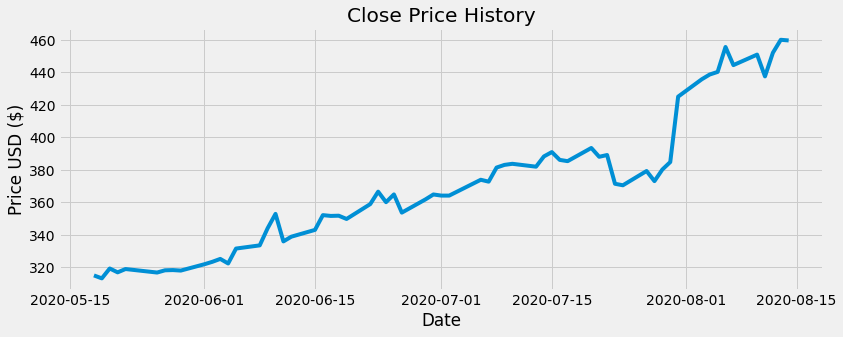

In [22]:
# Visually show the stock price

plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [23]:
# Calculate the MAD and signal ine indicators
# Calculate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
# Calculate the long term exponential moving average (EMA)
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
# Claculate the MACD line
MACD = ShortEMA - LongEMA
# Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

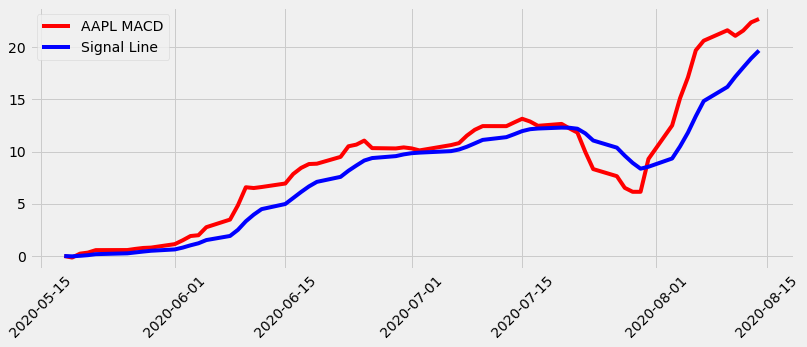

In [24]:
# Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label ='AAPL MACD', color='red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [25]:
# Create the new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2020-05-18,2020-05-18,313.170013,316.500000,310.320007,314.959991,314.393127,33843100,0.000000,0.000000
2020-05-19,2020-05-19,315.029999,318.519989,313.010010,313.140015,312.576447,25432400,-0.145183,-0.029037
2020-05-20,2020-05-20,316.679993,319.519989,316.519989,319.230011,318.655487,27876200,0.228535,0.022478
2020-05-21,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.279755,25672200,0.328872,0.083757
2020-05-22,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.316101,20450800,0.566472,0.180300
...,...,...,...,...,...,...,...,...,...
2020-08-10,2020-08-10,450.399994,455.100006,440.000000,450.910004,450.910004,53100900,21.616366,16.193362
2020-08-11,2020-08-11,447.880005,449.929993,436.429993,437.500000,437.500000,46975600,21.083247,17.171339
2020-08-12,2020-08-12,441.989990,453.100006,441.190002,452.040009,452.040009,41486200,21.585183,18.054108
2020-08-13,2020-08-13,457.720001,464.170013,455.709991,460.040009,460.040009,52520500,22.370629,18.917412


In [26]:
# Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy,Sell)

In [27]:
# Create buy and sell column 
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [28]:
# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2020-05-18,2020-05-18,313.170013,316.500000,310.320007,314.959991,314.393127,33843100,0.000000,0.000000,NaN,NaN
2020-05-19,2020-05-19,315.029999,318.519989,313.010010,313.140015,312.576447,25432400,-0.145183,-0.029037,NaN,313.140015
2020-05-20,2020-05-20,316.679993,319.519989,316.519989,319.230011,318.655487,27876200,0.228535,0.022478,319.230011,NaN
2020-05-21,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.279755,25672200,0.328872,0.083757,NaN,NaN
2020-05-22,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.316101,20450800,0.566472,0.180300,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-10,2020-08-10,450.399994,455.100006,440.000000,450.910004,450.910004,53100900,21.616366,16.193362,NaN,NaN
2020-08-11,2020-08-11,447.880005,449.929993,436.429993,437.500000,437.500000,46975600,21.083247,17.171339,NaN,NaN
2020-08-12,2020-08-12,441.989990,453.100006,441.190002,452.040009,452.040009,41486200,21.585183,18.054108,NaN,NaN
2020-08-13,2020-08-13,457.720001,464.170013,455.709991,460.040009,460.040009,52520500,22.370629,18.917412,NaN,NaN


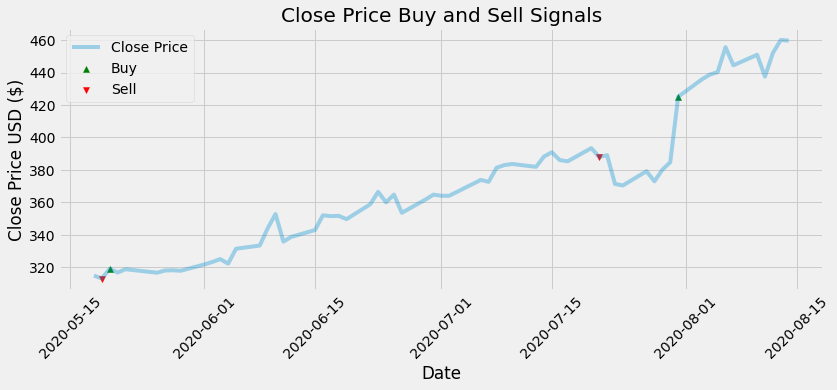

In [29]:
# Visually show the stock buy and sell signal
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()